### 4.3 Correlação e Regressão
#### 4.3.1 - Correlação dos Níveis Médios de PM2.5
Criamos uma matriz de correlação entre os níveis médios de PM2.5 em Portugal, Espanha, França e Itália para identificar relações entre os países.
A correlação de Pearson é calculada como:
$$
r = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum (X_i - \bar{X})^2 \sum (Y_i - \bar{Y})^2}}
$$
onde $$X$$ e $$Y$$ são as variáveis de interesse.

================ 4.3. CORRELAÇÃO E REGRESSÃO ================

4.3.1. Tabela de correlação entre Portugal, Espanha, França e Itália
País: Portugal, Número de registros: 540
País: Spain, Número de registros: 1386
País: France, Número de registros: 2376
País: Italy, Número de registros: 2412

Matriz de Correlação para PM2.5:
          Portugal   Spain  France   Italy
Portugal    1.0000 -0.1003  0.1798  0.0574
Spain      -0.1003  1.0000  0.0983  0.0669
France      0.1798  0.0983  1.0000  0.1157
Italy       0.0574  0.0669  0.1157  1.0000

Interpretação da matriz de correlação:
- Correlação entre Portugal e Spain: -0.1003 (fraca e negativa)
- Correlação entre Portugal e France: 0.1798 (fraca e positiva)
- Correlação entre Portugal e Italy: 0.0574 (fraca e positiva)
- Correlação entre Spain e France: 0.0983 (fraca e positiva)
- Correlação entre Spain e Italy: 0.0669 (fraca e positiva)
- Correlação entre France e Italy: 0.1157 (fraca e positiva)


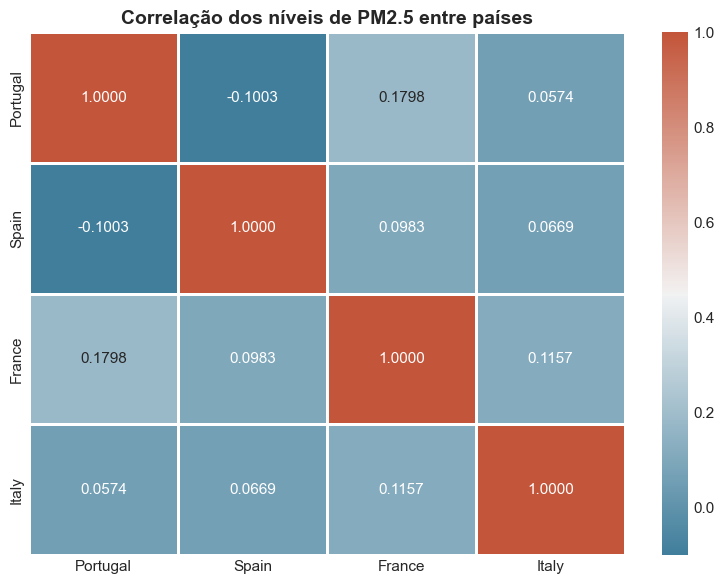

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson

# Configuração dos gráficos matplotlib 
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 13
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['axes.axisbelow'] = True  # Grid atrás dos dados
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

# Paleta de cores personalizada
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Estilo personalizado
plt.style.use('seaborn-v0_8-whitegrid')

print("================ ANÁLISE DE DADOS ================")
print("================ TRABALHO PRÁTICO ================")
print()

# Carregar os dados do csv
df = pd.read_csv('AIRPOL_data.csv', sep=';')

# Remover colunas desnecessárias
df = df.drop(columns=[col for col in df.columns if "Unnamed" in col])

# Converter colunas para numérico (substituindo vírgulas por pontos)
numeric_columns = ['Air_Pollution_Average[ug/m3]', 'Value', 'Populated_Area[km2]', 'Affected_Population']
for col in numeric_columns:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace(',', '.').astype(float)
        


# Verificar os tipos de dados após a conversão
print("Tipos de dados das colunas após conversão:")
print(df.dtypes)
print("\n" + "="*70 + "\n")


# ========================= 4.3. CORRELAÇÃO E REGRESSÃO =========================
print("================ 4.3. CORRELAÇÃO E REGRESSÃO ================")
print()

# 4.3.1 Tabela de correlação para PM2.5 entre Portugal, Espanha, França e Itália
print("4.3.1. Tabela de correlação entre Portugal, Espanha, França e Itália")
countries = ['Portugal', 'Spain', 'France', 'Italy']
correlation_data = {}

# Verificar quais países têm dados suficientes
for country in countries:
    country_data = df[(df['Country'] == country) & (df['Air_Pollutant'] == 'PM2.5')]
    if len(country_data) == 0:
        print(f"Aviso: Não existem dados de PM2.5 para {country}")
    else:
        correlation_data[country] = country_data['Air_Pollution_Average[ug/m3]'].values
        print(f"País: {country}, Número de registros: {len(country_data)}")

# Criar DataFrame para correlação (apenas para países com dados)
valid_countries = [country for country in countries if country in correlation_data and len(correlation_data[country]) > 0]

if len(valid_countries) > 1:
    # Determinar o tamanho mínimo para padronizar os arrays
    min_length = min(len(correlation_data[country]) for country in valid_countries)
    
    # Criar um DataFrame padronizado
    corr_df = pd.DataFrame()
    for country in valid_countries:
        corr_df[country] = correlation_data[country][:min_length]
    
    # Calcular e exibindo a matriz de correlação
    correlation_matrix = corr_df.corr(method='pearson')
    print("\nMatriz de Correlação para PM2.5:")
    print(correlation_matrix.round(4).to_string())
    
    # Interpretação da matriz de correlação
    print("\nInterpretação da matriz de correlação:")
    for i in range(len(valid_countries)):
        for j in range(i+1, len(valid_countries)):
            country1 = valid_countries[i]
            country2 = valid_countries[j]
            corr_value = correlation_matrix.iloc[i, j]
            
            if abs(corr_value) > 0.7:
                strength = "forte"
            elif abs(corr_value) > 0.3:
                strength = "moderada"
            else:
                strength = "fraca"
            
            direction = "positiva" if corr_value > 0 else "negativa"
            
            print(f"- Correlação entre {country1} e {country2}: {corr_value:.4f} ({strength} e {direction})")
    
    # Visualização da matriz de correlação - com estética melhorada
    plt.close('all')
    plt.figure(figsize=(8, 6))
    
    # Usar paleta divergente para melhor visualização
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    
    # Heatmap com anotações
    sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt='.4f', 
                linewidths=0.8, annot_kws={"size": 11})
    
    plt.title('Correlação dos níveis de PM2.5 entre países', fontweight='bold', fontsize=14)
    plt.tight_layout()
    plt.show()
else:
    print("Não há dados suficientes para calcular a matriz de correlação entre países.")
print()

#### 4.3.2 - Modelo de Regressão para Alemanha
Utilizamos um modelo de regressão linear para prever o número de mortes prematuras na Alemanha, considerando:

- **Variáveis Explicativas:**
  - $$X_1$$: Nível médio de poluição
  - $$X_2$$: Área da região afetada
- **Variável Dependente:**
  - $$Y$$: Número de mortes prematuras

O modelo de regressão linear segue a equação:
$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \varepsilon
$$

**Passos:**
1. Ajustamos um modelo de regressão linear usando mínimos quadrados ordinários (OLS).
2. Avaliamos os resíduos para garantir a adequação do modelo.
3. Verificamos a colinearidade através do fator de inflação da variância (VIF), calculado como:
$$
VIF_i = \frac{1}{1 - R_i^2}
$$
onde $$R_i^2$$ é o coeficiente de determinação da regressão da variável explicativa $$X_i$$ sobre as demais variáveis.
4. Analisamos a significância estatística dos coeficientes do modelo.


4.3.2. Regressão linear para dados da Alemanha
Número de registros para Alemanha (PM2.5): 8208

a) Modelo de regressão linear

Modelo de Regressão Linear:
                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     2622.
Date:                Thu, 27 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:29:31   Log-Likelihood:                -70030.
No. Observations:                8208   AIC:                         1.401e+05
Df Residuals:                    8205   BIC:                         1.401e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                   coef    std err     

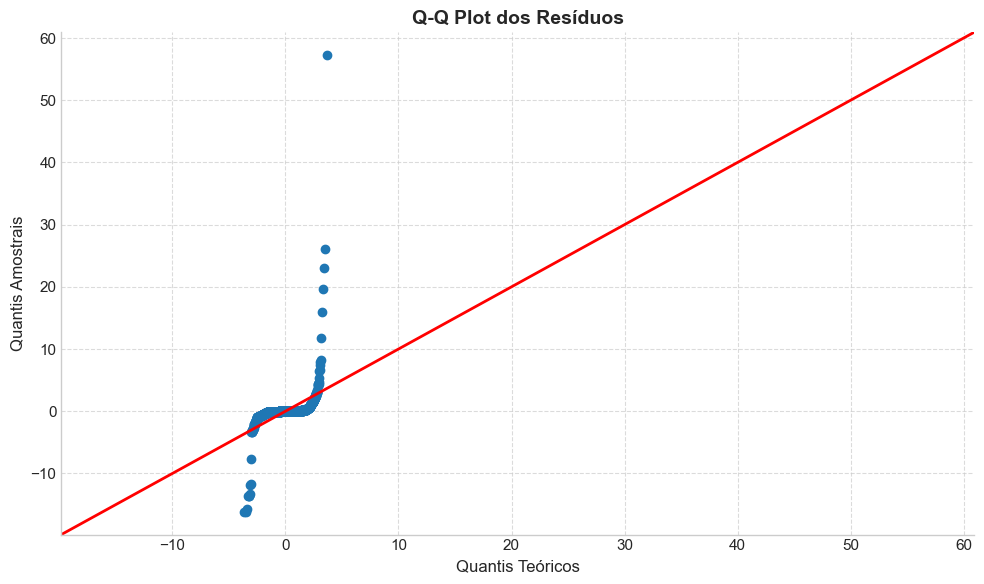


Teste de Shapiro-Wilk para normalidade dos resíduos (amostra):
Tamanho da amostra: 5000
Estatística W: 0.1004
Valor-p: 0.00000000
Conclusão: Os resíduos não seguem distribuição normal (rejeitamos H0).
No entanto, com amostras grandes, pequenos desvios da normalidade são comuns e
podem não afetar significativamente as conclusões da regressão devido ao Teorema
do Limite Central. A análise visual do Q-Q plot é recomendada como complemento.


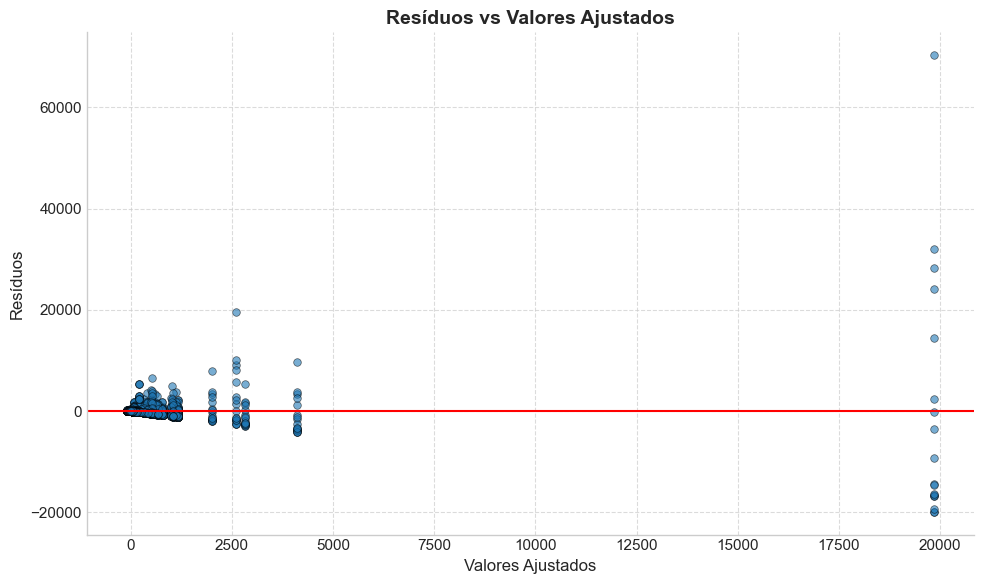


Teste de Breusch-Pagan para homocedasticidade:
Estatística LM: 1620.5389
Valor-p: 0.00000000
Conclusão: Os resíduos são heterocedásticos (rejeitamos H0).
Isso indica que a variância dos resíduos não é constante, o que pode afetar
a eficiência dos estimadores e os intervalos de confiança. Transformações nas
variáveis ou modelos de regressão robustos podem ser considerados.

c) Verificação de colinearidade (VIF)

Fator de Inflação da Variância (VIF):
                    Variável       VIF
                       const 77.223734
Air_Pollution_Average[ug/m3]  1.000382
         Populated_Area[km2]  1.000382

Conclusão: Foram detectados problemas de colinearidade nas seguintes variáveis:
- const: VIF = 77.2237
Um VIF > 10 indica alta colinearidade, o que pode afetar a precisão e
interpretabilidade dos coeficientes. Considere remover uma das variáveis
ou usar técnicas de redução de dimensionalidade.

d) Comentário sobre o modelo

Qualidade do modelo:
R²: 0.3899
R² ajustado: 0.3897
Estatística

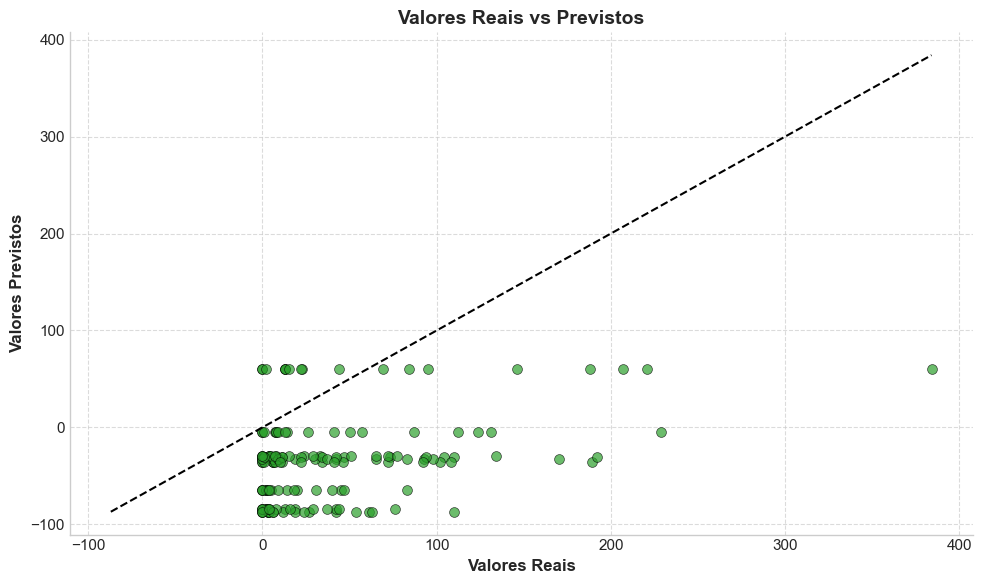

In [38]:


# 4.3.2 Regressão linear para dados da Alemanha
print("4.3.2. Regressão linear para dados da Alemanha")
df_germany = df[(df['Country'] == 'Germany') & (df['Air_Pollutant'] == 'PM2.5')].copy()

if len(df_germany) == 0:
    print("Aviso: Não há dados para a Alemanha com o poluente PM2.5.")
else:
    print(f"Número de registros para Alemanha (PM2.5): {len(df_germany)}")
    
    # Preparar os dados para regressão
    X = df_germany[['Air_Pollution_Average[ug/m3]', 'Populated_Area[km2]']]
    y = df_germany['Value']
    
    # Adicionar constante para o termo independente
    X_sm = sm.add_constant(X)
    
    try:
        # a) Modelo de regressão linear
        print("\na) Modelo de regressão linear")
        model = sm.OLS(y, X_sm).fit()
        print("\nModelo de Regressão Linear:")
        print(model.summary())
        
        # Equação do modelo
        coefs = model.params
        print("\nEquação do modelo de regressão:")
        print(f"Mortes = {coefs.iloc[0]:.4f} + {coefs.iloc[1]:.4f}*PM2.5 + {coefs.iloc[2]:.4f}*Área")
        
        # Interpretação dos coeficientes
        print("\nInterpretação dos coeficientes:")
        print(f"- Intercepto ({coefs.iloc[0]:.4f}): Representa o número estimado de mortes quando os níveis de PM2.5")
        print("  e a área populacional são zero (valor teórico).")
        print(f"- Coeficiente de PM2.5 ({coefs.iloc[1]:.4f}): Para cada aumento de 1 unidade no nível médio de PM2.5,")
        print(f"  o número de mortes aumenta em {coefs.iloc[1]:.4f}, mantendo a área constante.")
        print(f"- Coeficiente de Área ({coefs.iloc[2]:.4f}): Para cada aumento de 1 km² na área populacional,")
        print(f"  o número de mortes aumenta em {coefs.iloc[2]:.4f}, mantendo o nível de PM2.5 constante.")
        
        # b) Verificação das condições sobre os resíduos
        print("\nb) Verificação das condições sobre os resíduos")
        residuals = model.resid
        fitted_values = model.fittedvalues
        
        # Normalidade dos resíduos
        plt.close('all')
        fig, ax = plt.subplots(figsize=(10, 6))
        
        # QQ-plot com estética melhorada
        sm.qqplot(residuals, line='45', fit=True, ax=ax)
        ax.set_title('Q-Q Plot dos Resíduos', fontweight='bold', fontsize=14)
        ax.set_xlabel('Quantis Teóricos', fontsize=12)
        ax.set_ylabel('Quantis Amostrais', fontsize=12)
        ax.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
        
        # Amostra para teste de Shapiro-Wilk para evitar o aviso sobre amostras grandes
        sample_size = min(5000, len(residuals))
        residuals_sample = np.random.choice(residuals, size=sample_size, replace=False)
        
        # Teste de normalidade de Shapiro-Wilk
        shapiro_test = stats.shapiro(residuals_sample)
        print("\nTeste de Shapiro-Wilk para normalidade dos resíduos (amostra):")
        print(f"Tamanho da amostra: {sample_size}")
        print(f"Estatística W: {shapiro_test[0]:.4f}")
        print(f"Valor-p: {shapiro_test[1]:.8f}")
        
        if shapiro_test[1] > 0.05:
            print("Conclusão: Os resíduos seguem distribuição normal (não rejeitamos H0).")
        else:
            print("Conclusão: Os resíduos não seguem distribuição normal (rejeitamos H0).")
            print("No entanto, com amostras grandes, pequenos desvios da normalidade são comuns e")
            print("podem não afetar significativamente as conclusões da regressão devido ao Teorema")
            print("do Limite Central. A análise visual do Q-Q plot é recomendada como complemento.")
        
        # Homocedasticidade - gráfico melhorado esteticamente
        plt.close('all')
        fig, ax = plt.subplots(figsize=(10, 6))
        
        # Scatter plot melhorado
        ax.scatter(fitted_values, residuals, alpha=0.6, s=30, edgecolor='k', 
                  linewidth=0.5, color=colors[0])
        
        # Melhorar a linha de referência e rótulos
        ax.axhline(y=0, color='r', linestyle='-', linewidth=1.5)
        ax.set_title('Resíduos vs Valores Ajustados', fontweight='bold', fontsize=14)
        ax.set_xlabel('Valores Ajustados', fontsize=12)
        ax.set_ylabel('Resíduos', fontsize=12)
        ax.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
        
        # Teste de Breusch-Pagan para homocedasticidade
        bp_test = sm.stats.het_breuschpagan(residuals, X_sm)
        print("\nTeste de Breusch-Pagan para homocedasticidade:")
        print(f"Estatística LM: {bp_test[0]:.4f}")
        print(f"Valor-p: {bp_test[1]:.8f}")
        
        if bp_test[1] > 0.05:
            print("Conclusão: Os resíduos são homocedásticos (não rejeitamos H0).")
            print("Isso significa que a variância dos resíduos é constante ao longo dos valores ajustados,")
            print("o que é uma condição desejável para o modelo de regressão linear.")
        else:
            print("Conclusão: Os resíduos são heterocedásticos (rejeitamos H0).")
            print("Isso indica que a variância dos resíduos não é constante, o que pode afetar")
            print("a eficiência dos estimadores e os intervalos de confiança. Transformações nas")
            print("variáveis ou modelos de regressão robustos podem ser considerados.")
        
        # c) Verificação de colinearidade (VIF)
        print("\nc) Verificação de colinearidade (VIF)")
        vif_data = pd.DataFrame()
        vif_data["Variável"] = X_sm.columns
        vif_data["VIF"] = [variance_inflation_factor(X_sm.values, i) for i in range(X_sm.shape[1])]
        
        # Formatação melhorada da tabela VIF
        print("\nFator de Inflação da Variância (VIF):")
        print(vif_data.to_string(index=False))
        
        # Interpretação do VIF
        problematic_vars = vif_data[vif_data["VIF"] > 10]
        if len(problematic_vars) > 0:
            print("\nConclusão: Foram detectados problemas de colinearidade nas seguintes variáveis:")
            for _, row in problematic_vars.iterrows():
                print(f"- {row['Variável']}: VIF = {row['VIF']:.4f}")
            print("Um VIF > 10 indica alta colinearidade, o que pode afetar a precisão e")
            print("interpretabilidade dos coeficientes. Considere remover uma das variáveis")
            print("ou usar técnicas de redução de dimensionalidade.")
        else:
            print("\nConclusão: Não foram detectados problemas de colinearidade (VIF < 10 para todas as variáveis).")
            print("Isso indica que as variáveis explicativas não estão fortemente correlacionadas")
            print("entre si, o que é desejável para o modelo de regressão linear.")
        
        # d) Comentário sobre o modelo
        print("\nd) Comentário sobre o modelo")
        r2 = model.rsquared
        adj_r2 = model.rsquared_adj
        f_stat = model.fvalue
        f_pvalue = model.f_pvalue
        
        print("\nQualidade do modelo:")
        print(f"R²: {r2:.4f}")
        print(f"R² ajustado: {adj_r2:.4f}")
        print(f"Estatística F: {f_stat:.4f}")
        print(f"Valor-p (F): {f_pvalue:.8f}")
        
        # Interpretação da qualidade do modelo
        if r2 < 0.3:
            r2_quality = "fraco"
        elif r2 < 0.7:
            r2_quality = "moderado"
        else:
            r2_quality = "forte"
            
        print("\nConclusão sobre a qualidade do modelo:")
        print(f"- O modelo apresenta um poder explicativo {r2_quality} (R² = {r2:.4f}), o que significa")
        print(f"  que {r2*100:.2f}% da variabilidade no número de mortes prematuras pode ser")
        print("  explicada pelas variáveis incluídas no modelo (nível de PM2.5 e área populacional).")
        
        if f_pvalue < 0.05:
            print("- O modelo como um todo é estatisticamente significativo (valor-p < 0.05 para o teste F),")
            print("  rejeitando a hipótese nula de que todos os coeficientes são zero.")
        else:
            print("- O modelo como um todo não é estatisticamente significativo (valor-p >= 0.05 para o teste F),")
            print("  o que indica que as variáveis explicativas não são suficientes para prever a variável resposta.")
        
        # Verificando a significância individual dos coeficientes
        sig_vars = []
        nonsig_vars = []
        
        for var, pval in model.pvalues.items():
            if pval < 0.05:
                sig_vars.append(var)
            else:
                nonsig_vars.append(var)
        
        if len(sig_vars) > 0:
            print("- Variáveis estatisticamente significativas (p < 0.05):")
            for var in sig_vars:
                print(f"  * {var}: p = {model.pvalues[var]:.4f}")
        
        if len(nonsig_vars) > 0:
            print("- Variáveis não estatisticamente significativas (p >= 0.05):")
            for var in nonsig_vars:
                print(f"  * {var}: p = {model.pvalues[var]:.4f}")
        
        # e) Estimativa para regiões específicas
        print("\ne) Estimativa para regiões específicas")
        nuts_codes = ['DE131', 'DE132', 'DE133', 'DE134', 'DE135', 'DE136', 'DE137', 'DE138', 'DE139']
        germany_specific = df_germany[df_germany['NUTS_Code'].isin(nuts_codes)]
        
        if len(germany_specific) == 0:
            print("\nNão foram encontrados dados para os códigos NUTS específicos.")
            
            # Alternativa: usar qualquer região disponível
            print("Usando as primeiras regiões disponíveis para previsão...")
            germany_specific = df_germany.head(min(9, len(df_germany)))
        
        if len(germany_specific) > 0:
            X_pred = germany_specific[['Air_Pollution_Average[ug/m3]', 'Populated_Area[km2]']]
            X_pred = sm.add_constant(X_pred)
            y_real = germany_specific['Value']
            y_pred = model.predict(X_pred)
            
            comparison = pd.DataFrame({
                'NUTS_Code': germany_specific['NUTS_Code'],
                'Valor Real': y_real,
                'Valor Previsto': y_pred,
                'Erro': y_real - y_pred,
                'Erro Percentual': abs((y_real - y_pred) / y_real * 100)
            })
            
            # Formatação melhorada da tabela de comparação
            print("\nComparação entre valores reais e previstos:")
            # Limitando a exibição para melhor visualização
            print(comparison.head(10).round(2).to_string(index=False))
            if len(comparison) > 10:
                print(f"... e mais {len(comparison)-10} linhas")
            
            # Cálculo do erro médio absoluto e erro quadrático médio
            mae = abs(comparison['Erro']).mean()
            mse = (comparison['Erro'] ** 2).mean()
            rmse = np.sqrt(mse)
            # Evita problemas com divisão por zero ou valores muito pequenos
            valid_percentages = comparison[comparison['Valor Real'].abs() > 0.1]['Erro Percentual']
            mape = valid_percentages.mean() if len(valid_percentages) > 0 else float('nan')
            
            print("\nMétricas de erro para as previsões:")
            print(f"Erro Médio Absoluto (MAE): {mae:.4f}")
            print(f"Erro Quadrático Médio (MSE): {mse:.4f}")
            print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.4f}")
            print(f"Erro Percentual Absoluto Médio (MAPE): {mape:.4f}%")
            
            # Conclusão sobre as previsões
            if mape < 10:
                accuracy = "alta"
            elif mape < 20:
                accuracy = "moderada"
            else:
                accuracy = "baixa"
                
            print(f"\nConclusão: O modelo apresenta uma precisão {accuracy} para as regiões específicas,")
            print(f"com um erro percentual médio de {mape:.2f}%. Os resultados indicam que o modelo")
            
            if accuracy == "alta":
                print("é adequado para prever o número de mortes prematuras nestas regiões específicas.")
            elif accuracy == "moderada":
                print("pode ser utilizado para prever o número de mortes prematuras nestas regiões,")
                print("mas os resultados devem ser interpretados com cautela.")
            else:
                print("não é adequado para prever com precisão o número de mortes prematuras")
                print("nestas regiões específicas. Recomenda-se revisar o modelo ou incluir")
                print("variáveis explicativas adicionais.")
            
            # Visualização dos valores reais vs previstos (com melhor estética)
            plt.close('all')
            fig, ax = plt.subplots(figsize=(10, 6))
            
            # Scatter plot com melhor estética
            ax.scatter(y_real, y_pred, alpha=0.7, s=50, color=colors[2], 
                      edgecolor='black', linewidth=0.5)
            
            # Linha de referência (y=x)
            min_val = min(y_real.min(), y_pred.min())
            max_val = max(y_real.max(), y_pred.max())
            ax.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=1.5)
            
            # Melhorando rótulos e título
            ax.set_xlabel('Valores Reais', fontsize=12, fontweight='bold')
            ax.set_ylabel('Valores Previstos', fontsize=12, fontweight='bold')
            ax.set_title('Valores Reais vs Previstos', fontsize=14, fontweight='bold')
            
            # Adicionando grade
            ax.grid(True, linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()
    
    except Exception as e:
        print(f"\nErro ao criar o modelo de regressão: {e}")
        print("Verifique se há problemas nos dados ou nos tipos das variáveis.")
print()






#### E) - Estimativa de Mortes Prematuras
Usamos o modelo de regressão para estimar o número de mortes prematuras nas regiões alemãs com códigos NUTS: DE131, DE132, DE133, DE134, DE135, DE136, DE137, DE138 e DE139. Comparamos os valores estimados com os valores reais para avaliar a precisão do modelo.

---

### Conclusão
Os testes estatísticos e análises permitiram compreender as diferenças entre países em relação à poluição atmosférica e seu impacto na saúde pública. A regressão linear possibilitou estimar os impactos da poluição nas mortes prematuras na Alemanha. As análises post-hoc podem complementar essas descobertas.